***
# WorldQuant University
<b>MScFE 610 Econometrics: Group Project 2 Submission</b><br>
***

<b>Group 11 Team Members:</b>

- Beh Min Yan
- Mohammadkian Maghsoodi
- Rahul Patil

***

# 0 Selecting a data set

<br/>

**We have chosen the below datasets:**

- **Gold ETF:** SPDR Gold Shares (GLD). 
    - Source: https://finance.yahoo.com/quote/GLD/


- **Equity ETF:** Vanguard FTSE Europe Index Fund ETF Shares (VGK).
    - Source: https://finance.yahoo.com/quote/vgk/


- **Bitcoin:** Denominated in USD (BTC-USD).
    - Source: https://finance.yahoo.com/quote/BTC-USD/

In [1]:
GOLD_ETF = 'GLD'     # SPDR Gold Shares (GLD)
EQUITY_ETF = 'VGK'   # Vanguard FTSE Europe Index Fund ETF Shares (VGK)
BITCOIN = 'BTC-USD'

START_DATE = '2020-01-01'
END_DATE = '2020-12-31'

***
# 1. Data Importing

#### Import Libraries

In [2]:
# !pip install dataclasses     # uncomment to install package if you haven't

In [3]:
from dataclasses import dataclass
from enum import Enum
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

pd.options.display.max_rows = 15

<b>1.1) Import closing prices for the entire year of 2020 for your gold ETF, your equity ETF, and bitcoin.</b>

In [4]:
def download_datasets(tickers, start=START_DATE, end=END_DATE):
    return [yf.download([t], start=start, end=end) for t in tickers]

gold_etf_df, equity_etf_df, bitcoin_df = download_datasets([GOLD_ETF, EQUITY_ETF, BITCOIN])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Consolidate imported close prices of all 3 assets into 1 dataframe

closing_prices = pd.DataFrame({
    'Gold ETF': gold_etf_df['Adj Close'],
    'Equity ETF': equity_etf_df['Adj Close'],
    'Bitcoin': bitcoin_df['Adj Close']
}, index=bitcoin_df.index)

print('Closing prices for entire year of 2020:')
closing_prices

Closing prices for entire year of 2020:


,Gold ETF,Equity ETF,Bitcoin
Date,,,
2019-12-31,142.899994,55.597294,7193.599121
2020-01-01,NaN,NaN,7200.174316
2020-01-02,143.949997,56.062183,6985.470215
2020-01-03,145.860001,55.360100,7344.884277
2020-01-04,NaN,NaN,7410.656738
...,...,...,...
2020-12-26,NaN,NaN,26437.037109
2020-12-27,NaN,NaN,26272.294922
2020-12-28,175.710007,59.336597,27084.808594


<div class="alert alert-block alert-info">
Note that BTC trades 24/7, and therefore has daily close prices 7 days a week. For weekends and non-trading days, for a more accurate representation, we have made the decision to leave them as NaN for Gold and Equity ETF columns instead of forward-filling the data.
</div>    


<b>1.2) Import your gold ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)</b>

<br/>

**Selected Gold ETF:** SPDR Gold Shares (GLD). [[Source](https://finance.yahoo.com/quote/GLD/)]

In [6]:
gold_etf_df['2020-04-01':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300
2020-04-07,155.330002,156.139999,154.380005,156.039993,156.039993,9195400
...,...,...,...,...,...,...
2020-12-23,175.100006,176.210007,175.059998,175.649994,175.649994,6542800
2020-12-24,175.550003,176.369995,175.509995,176.350006,176.350006,3695400
2020-12-28,177.259995,177.910004,175.630005,175.710007,175.710007,7778700


<b>1.3) Import your equity ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)</b>

<br/>

**Selected Equity ETF:** Vanguard FTSE Europe Index Fund ETF Shares (VGK). [[Source](https://finance.yahoo.com/quote/vgk/)]

In [7]:
equity_etf_df['2020-04-01':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,42.020000,42.400002,41.340000,41.380001,39.518627,6718800
2020-04-02,41.389999,42.459999,41.360001,42.169998,40.273087,7903800
2020-04-03,41.590000,41.680000,40.959999,41.290001,39.432674,5113100
2020-04-06,42.689999,43.480000,42.540001,43.330002,41.380909,8061200
2020-04-07,44.689999,44.759998,43.500000,43.590000,41.629211,7931100
...,...,...,...,...,...,...
2020-12-23,59.880001,60.110001,59.790001,60.040001,58.788280,2826000
2020-12-24,60.160000,60.230000,59.950001,60.189999,58.935150,1453300
2020-12-28,60.779999,60.869999,60.509998,60.599998,59.336597,1942100


<b>1.4) Import your bitcoin prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)</b>

<br/>

**Ticker:** BTC-USD. [[Source](https://finance.yahoo.com/quote/BTC-USD/)]

In [8]:
bitcoin_df['2020-04-01':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,40346426266
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,6793.624512,47660646124
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,6733.387207,38976504903
2020-04-04,6738.382812,6878.953613,6696.484863,6867.527344,6867.527344,33185988584
2020-04-05,6862.537598,6883.414062,6715.929199,6791.129395,6791.129395,29510409856
...,...,...,...,...,...,...
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893


## 2. Data Processing

First we wrote a utility method for adding a DataFrame column called `Daily Returns` to each dataset.

In [9]:
def compute_returns(df, col='Adj Close', start='2020-04-01'):
    df['Daily Returns'] = df[col].pct_change()
    return df[~df['Daily Returns'].isnull()][start:]

<b>2.1) Compute the daily returns of your gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [10]:
gold_etf_returns_df = compute_returns(gold_etf_df)

print('Daily returns for Gold ETF:')
gold_etf_returns_df[['Adj Close', 'Daily Returns']]

Daily returns for Gold ETF:


,Adj Close,Daily Returns
Date,,
2020-04-01,149.449997,0.009456
2020-04-02,151.899994,0.016393
2020-04-03,152.649994,0.004937
2020-04-06,156.880005,0.027711
2020-04-07,156.039993,-0.005354
...,...,...
2020-12-23,175.649994,0.006648
2020-12-24,176.350006,0.003985
2020-12-28,175.710007,-0.003629


In [11]:
equity_etf_returns_df = compute_returns(equity_etf_df)

print('Daily returns for Equity ETF:')
equity_etf_returns_df[['Adj Close', 'Daily Returns']]

Daily returns for Equity ETF:


,Adj Close,Daily Returns
Date,,
2020-04-01,39.518627,-0.043900
2020-04-02,40.273087,0.019091
2020-04-03,39.432674,-0.020868
2020-04-06,41.380909,0.049407
2020-04-07,41.629211,0.006000
...,...,...
2020-12-23,58.788280,0.013333
2020-12-24,58.935150,0.002498
2020-12-28,59.336597,0.006812


In [12]:
bitcoin_returns_df = compute_returns(bitcoin_df)

print('Daily returns for Bitcoin:')
bitcoin_returns_df[['Adj Close', 'Daily Returns']]

Daily returns for Bitcoin:


,Adj Close,Daily Returns
Date,,
2020-04-01,6606.776367,0.026113
2020-04-02,6793.624512,0.028281
2020-04-03,6733.387207,-0.008867
2020-04-04,6867.527344,0.019922
2020-04-05,6791.129395,-0.011125
...,...,...
2020-12-26,26437.037109,0.071853
2020-12-27,26272.294922,-0.006231
2020-12-28,27084.808594,0.030927


# 3 Data Summaries

Here, we have also provided reusable functions for calculating the moving averages for any DataFrame indexed by date.

In [13]:
def compute_moving_average(df, days):
    df[f'MA{days}'] = df['Adj Close'].rolling(days).mean()
    return df

<b>3.1) Compute a 20-day moving average price of your gold ETF.  The moving average price on 1 April 2020 should include data from March.</b> <br/>
Be sure to either graph or show a table of these values.

,Adj Close,MA20
Date,,
2020-01-29,148.460007,146.627500
2020-01-30,148.470001,146.906001
2020-01-31,149.330002,147.175001
2020-02-03,148.360001,147.300001
2020-02-04,146.429993,147.252000
...,...,...
2020-12-23,175.649994,172.893500
2020-12-24,176.350006,173.235500
2020-12-28,175.710007,173.631501


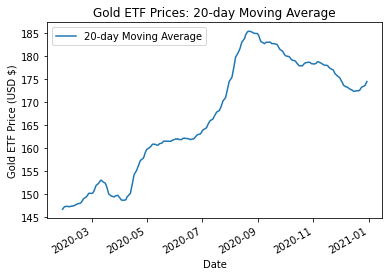

In [14]:
gold_ma = compute_moving_average(gold_etf_df, days=20)
gold_ma.plot(y='MA20', use_index=True,
             label='20-day Moving Average',
             title='Gold ETF Prices: 20-day Moving Average')
plt.ylabel('Gold ETF Price (USD $)')
gold_ma[~gold_ma.MA20.isnull()][['Adj Close', 'MA20']]

<b>3.2) Compute a 20-day moving average price of your equity ETF.  The moving average price on 1 April 2020 should include data from March.</b>

,Adj Close,MA20
Date,,
2020-01-29,54.752899,55.406592
2020-01-30,54.724438,55.362949
2020-01-31,53.880039,55.253842
2020-02-03,53.899017,55.180787
2020-02-04,54.800327,55.142362
...,...,...
2020-12-23,58.788280,57.656022
2020-12-24,58.935150,57.777210
2020-12-28,59.336597,57.905415


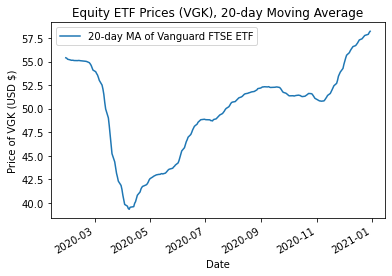

In [15]:
equity_ma = compute_moving_average(equity_etf_df, days=20)
equity_ma.plot(y='MA20', use_index=True,
               label='20-day MA of Vanguard FTSE ETF',
               title='Equity ETF Prices (VGK), 20-day Moving Average')
plt.ylabel('Price of VGK (USD $)')
equity_ma[~equity_ma.MA20.isnull()][['Adj Close', 'MA20']]

<b>3.3) Compute a 20-day moving average price of bitcoin.  The moving average price on 1 April 2020 should include data from March.</b>

,Adj Close,MA20
Date,,
2020-01-19,8706.245117,8045.769067
2020-01-20,8657.642578,8118.971240
2020-01-21,8745.894531,8196.257251
2020-01-22,8680.875977,8281.027539
2020-01-23,8406.515625,8334.109106
...,...,...
2020-12-26,26437.037109,21413.321484
2020-12-27,26272.294922,21767.354687
2020-12-28,27084.808594,22205.537891


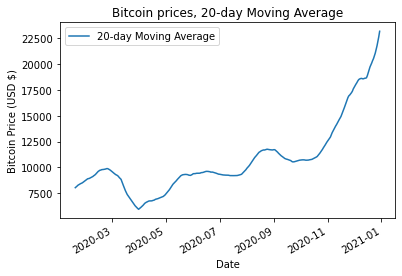

In [16]:
bitcoin_ma = compute_moving_average(bitcoin_df, days=20)
bitcoin_ma.plot(y='MA20', use_index=True,
                label='20-day Moving Average',
                title='Bitcoin prices, 20-day Moving Average')
plt.ylabel('Bitcoin Price (USD $)')
bitcoin_ma[~bitcoin_ma.MA20.isnull()][['Adj Close', 'MA20']]

# 4 Graphing

<b>4.1) Graph each price series along with its moving average from April 2020 through Dec 2020.</b>

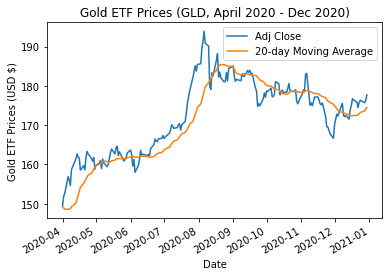

In [17]:
# Graph Gold ETF Prices & 20-day moving averages from 01 Apr'20
gold_apr_dec = gold_ma['2020-04-01':]
gold_plt = gold_apr_dec.plot(y='Adj Close', use_index=True)
gold_apr_dec.plot(y='MA20', use_index=True, ax=gold_plt,
                  label='20-day Moving Average')

plt.title('Gold ETF Prices (GLD, April 2020 - Dec 2020)')
plt.ylabel('Gold ETF Prices (USD $)')
plt.show()

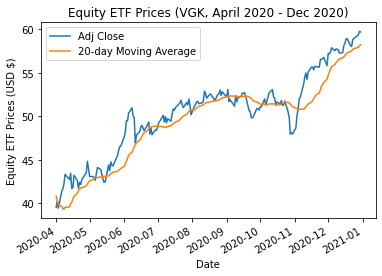

In [18]:
# Graph Equity ETF Prices & 20-day moving averages from 01 Apr'20
equity_apr_dec = equity_ma['2020-04-01':]
equity_plt = equity_apr_dec.plot(y='Adj Close', use_index=True)
equity_apr_dec.plot(y='MA20', use_index=True, ax=equity_plt,
                    label='20-day Moving Average')

plt.title('Equity ETF Prices (VGK, April 2020 - Dec 2020)')
plt.ylabel('Equity ETF Prices (USD $)')
plt.show()

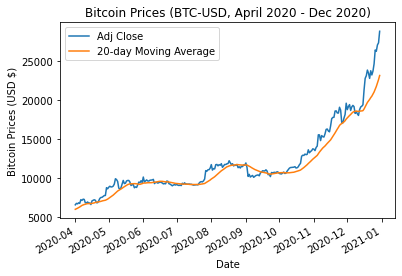

In [19]:
# Graph Bitcoin Prices & 20-day moving averages from 01 Apr'20
bitcoin_apr_dec = bitcoin_ma['2020-04-01':]
bitcoin_plt = bitcoin_apr_dec.plot(y='Adj Close', use_index=True)
bitcoin_apr_dec.plot(y='MA20', use_index=True, ax=bitcoin_plt, 
                     label='20-day Moving Average')

plt.title('Bitcoin Prices (BTC-USD, April 2020 - Dec 2020)')
plt.ylabel('Bitcoin Prices (USD $)')
plt.show()



<div class="alert alert-block alert-success">

<b>4.2) Comment on how the price series and average series intersect or not.</b><br/>
   
For all three assets, the price and moving average series do intersect (multiple times in the year, in fact). This is because of a well-subscribed theory of financial markets known as <b>mean reversion</b> which suggests that, after an extreme upward or downward price movements, asset prices tend to return back to normal or average levels. This is why prices routinely oscillate around the moving average prices and tend to return to that level over and over.

</div>    


<b>4.3) Graph gold and equity prices on the same plot.</b><br/>
Use a separate scale for each series, and be sure to add a label and legend.

In [20]:
# Utility methods for plotting two price series on the same plot

def get_xy_series(asset_df):
    return list(asset_df.index), list(asset_df['Adj Close'])

def twin_plot(asset1, asset2):
    
    # Create twin plots with ax1 and ax2
    fig, ax1 = plt.subplots(figsize=(16,4))
    ax2 = ax1.twinx()
    
    # Initialise chart attributes
    labels = [asset.name.replace('_', ' ') for asset in [asset1, asset2]]
    chart1, chart2 = asset1.value, asset2.value
    colors = [chart1.color, chart2.color]
    ax1.set_ylim(chart1.ylim)
    ax2.set_ylim(chart2.ylim)
    ax1.set_xlabel('Date')
    ax1.grid(True)
    
    # Plot both series in chart, and configure legend and y labels
    series1 = ax1.plot(chart1.x, chart1.y, color=chart1.color, label=labels[0])
    series2 = ax2.plot(chart2.x, chart2.y, color=chart2.color, label=labels[1])
    ax1.legend(series1 + series2, labels, loc='lower right')
    for i, ax in enumerate([ax1, ax2]):
        ax.set_ylabel(f'{labels[i]} Prices', color=colors[i])
    
    plt.title(f'{labels[0]} and {labels[1]} Prices (in USD $)') # configure title
    plt.show()

In [21]:
# Modularise Chart config into a dataclass
@dataclass
class Chart:
    x: list
    y: list
    color: str
    ylim: tuple

# Create chart config for all 3 assets
class Asset(Enum):
    Gold_ETF = Chart(*get_xy_series(gold_etf_df), 'orange', (130,200))
    Equity_ETF = Chart(*get_xy_series(equity_etf_df), 'blue', (35,70))
    Bitcoin = Chart(*get_xy_series(bitcoin_df), 'purple', (5000,30000))

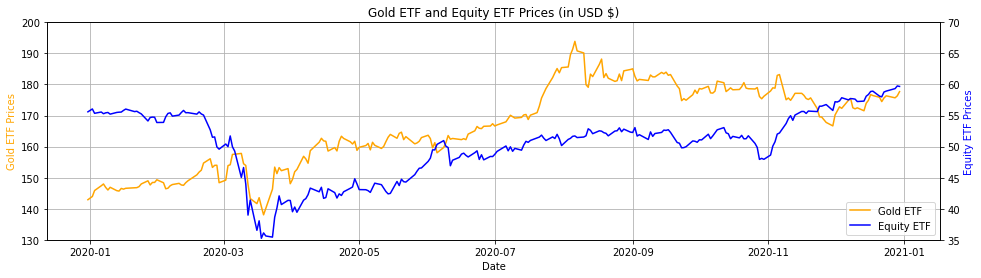

In [22]:
twin_plot(Asset.Gold_ETF, Asset.Equity_ETF)

<b>4.4) Graph gold and bitcoin prices on the same plot.</b><br/>
Use a separate scale for each series, and be sure to add a label and legend.

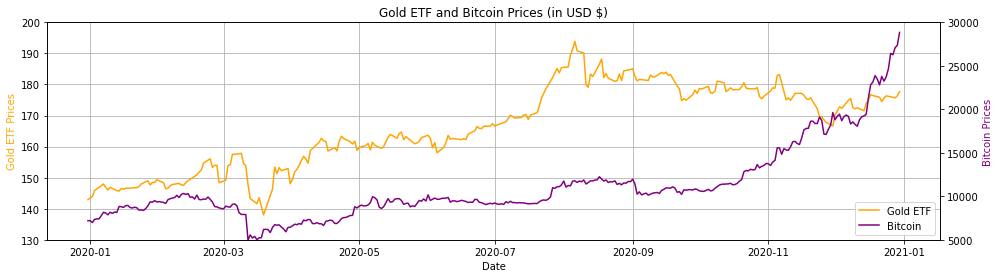

In [23]:
twin_plot(Asset.Gold_ETF, Asset.Bitcoin)

<b>4.5) Graph equity and bitcoin prices on the same plot.</b><br/>
Use a separate scale for each series, and be sure to add a label and legend.

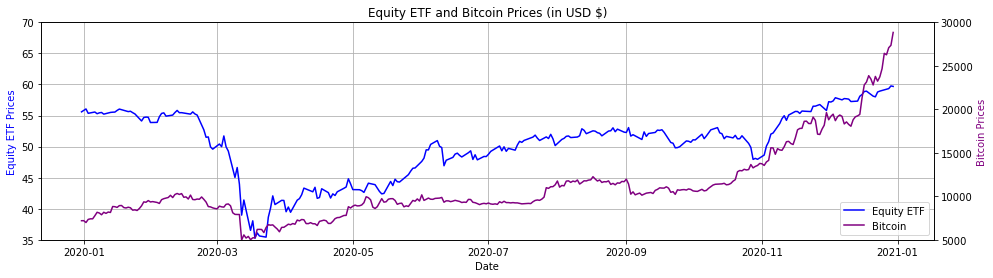

In [24]:
twin_plot(Asset.Equity_ETF, Asset.Bitcoin)

---
# 5 Fitting a GARCH Model

<b>5.1) Pick one of the 3 series (gold, equity, or bitcoin).</b>

`Selected Series: __________________________`

* Fit a GARCH model for quarter 2 (Q2).
* Fit a GARCH model for quarter 3 (Q3).  
* Fit a GARCH model for quarter 4 (Q4).

### GARCH model for Q2

### GARCH model for Q3

### GARCH model for Q4

<b>5.2) Repeat the process, but instead using GARCH-M Model. </b>

### GARCH-M model for Q2

### GARCH-M model for Q3

### GARCH-M model for Q4

<b>5.3) Repeat the process one more time, using another variation of GARCH. </b><br/>
(e.g. Threshold GARCH, Exponential GARCH, Integrated GARCH)

### ? model for Q2

### ? model for Q3

### ? model for Q4



<div class="alert alert-block alert-success">

<b>5.4) What are the 3 long-term variances indicated by the models?</b><br/>
(1 point for each correct variance)<br/><br/>
    
The long-term variances are...
</div>    


---
# 6 Assessing Stationarity

<b>6.1) Pick 1 of the 3 quarters in 2020 (Q2, Q3, or Q4).  Test your gold ETF for stationarity.  Explicitly state which test you used to determine stationarity.</b><br/>

`Selected Quarter:  _________`<br/>
`Test Used:         _________`

<div class="alert alert-block alert-success">

<b>Conclusion:</b> Gold ETF prices in Q(?) is / is not stationary because<br/>
</div>

<b>6.2) Using the same quarter, test your equity ETF for stationarity. Explicitly state which test you used to determine stationarity.</b><br/>

`Selected Quarter:  _________`<br/>
`Test Used:         _________`

<div class="alert alert-block alert-success">

<b>Conclusion:</b> Equity ETF prices in Q(?) is / is not stationary because<br/>
</div>

<b>6.3) Using the same quarter, test Bitcoin for stationarity. Explicitly state which test you used to determine stationarity.</b><br/>

`Selected Quarter:  _________`<br/>
`Test Used:         _________`

<div class="alert alert-block alert-success">

<b>Conclusion:</b> Bitcoin prices in Q(?) is / is not stationary because<br/>
</div>

---
# 7 Modelling Cointegration

In [ ]:
q2_start = '2020-04-01'
q3_end = '2020-09-30'

gold_q2q3 = gold_etf_df[q2_start:q3_end]
equity_q2q3 = equity_etf_df[q2_start:q3_end]
bitcoin_q2q3 = bitcoin_df[q2_start:q3_end]

bitcoin_q2q3

<b>7.1) Using Q2 and Q3 data (April - Sept period), test all the 3 combinations of cointegration using Engle-Granger and Johansen test as following: (gold, equity), (equity, bitcoin) and (bitcoin, gold).
</b><br/>

### Engle-Granger Test

In [ ]:
# (gold, equity)


# (gold, bitcoin)


# (equity, bitcoin)



### Johansen Test

In [ ]:
# (gold, equity)


# (gold, bitcoin)


# (equity, bitcoin)



<div class="alert alert-block alert-success">

<b>7.2) Explain if Johansen test and Engle-Granger provided different results. </b><br/>
</div>

<b>7.3) Implement a VEC model and forecast Q4 evolution. Comment results. (Provide arguments if VEC can not be used).
</b><br/>

<div class="alert alert-block alert-success">

<b> Comment on the results. Can VEC be used? </b><br/>

VEC can/cannot be used because ...
</div>

<b>7.4) Implement a VAR model and forecast Q4 evolution.</b><br/>

<div class="alert alert-block alert-success">

<b> Comment on the results: </b><br/>

</div>

<b>7.5) Repeat the entire process using all three variables (equity, gold and bitcoin). Comment forecasts and results.</b><br/> 


<div class="alert alert-block alert-success">

<b> Comment on the forecasts and results: </b><br/>

<li>Equity</li>

...

<li>Gold</li>

...

<li>Bitcoin</li>
...

</div>

---
# 8 Correlation vs Cointegration

Discuss as a group and briefly explain your answers with an example from the data set you are using. (Max 300 words.)

<div class="alert alert-block alert-success">

<b>8.1) Does correlation have a direction?  In other words, is the correlation of x and y equal to correlation of y and x?</b><br/>
</div>

<div class="alert alert-block alert-success">
<b>8.2) Does linear regression have a direction?  Are the slope and intercept the same if x is regressed on y, or y is regressed on x?</b><br/>
</div>

<div class="alert alert-block alert-success">
<b>8.3) Does cointegration have a direction?  Will the cointegrating vector be the same if x is regressed on y, or if y is regressed on x?</b><br/>
</div>

---

_(End of Questions 1-8)_